# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 3 (Friday) 11:00 pm </b> </font>

### Hari Chandana Chavva

# Introduction
This dataset is from the UCI Machine Learning Repository and contains information about individuals' salary and demographic information.

The goal is to predict whether an individual earns more or less than $50,000 based on their demographic information

The Dataset explains about the adult census income of 1994 census bureau database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).The prediction task is to determine whether a person makes over $50K a year.Additionally, the ACS dataset provides information on income and poverty levels by demographic groups such as race, age, and gender. The data is based on a sample of the population and is released annually. It can be used to analyze income inequality and identify areas with high concentrations of poverty.

We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.



# Data - Description

The data contains 14 features such as age, workclass, education, etc.

There are 32561 rows in the dataset.

The target variable is 'income', which is binary (either '<=50K' or '>50K'). 
The Entire Dataset consists of 15 columns. They are ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Number of Instances - 32562

Source link for the data - https://www.kaggle.com/datasets/uciml/adult-census-income

### Preliminary observation

Load the data and perform some initial exploratory data analysis (EDA) to get a feel for the data.

In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
data = pd.read_csv('/Users/Nagarjuna/Downloads/adult.csv')



In [207]:
data.shape

(32561, 15)

In [208]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [209]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [211]:
data.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Preprocessing of the data:

Perform necessary preprocessing steps, such as filling missing values, encoding categorical variables, etc.

In [212]:
data.dropna(inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [213]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


### Visualisation of data

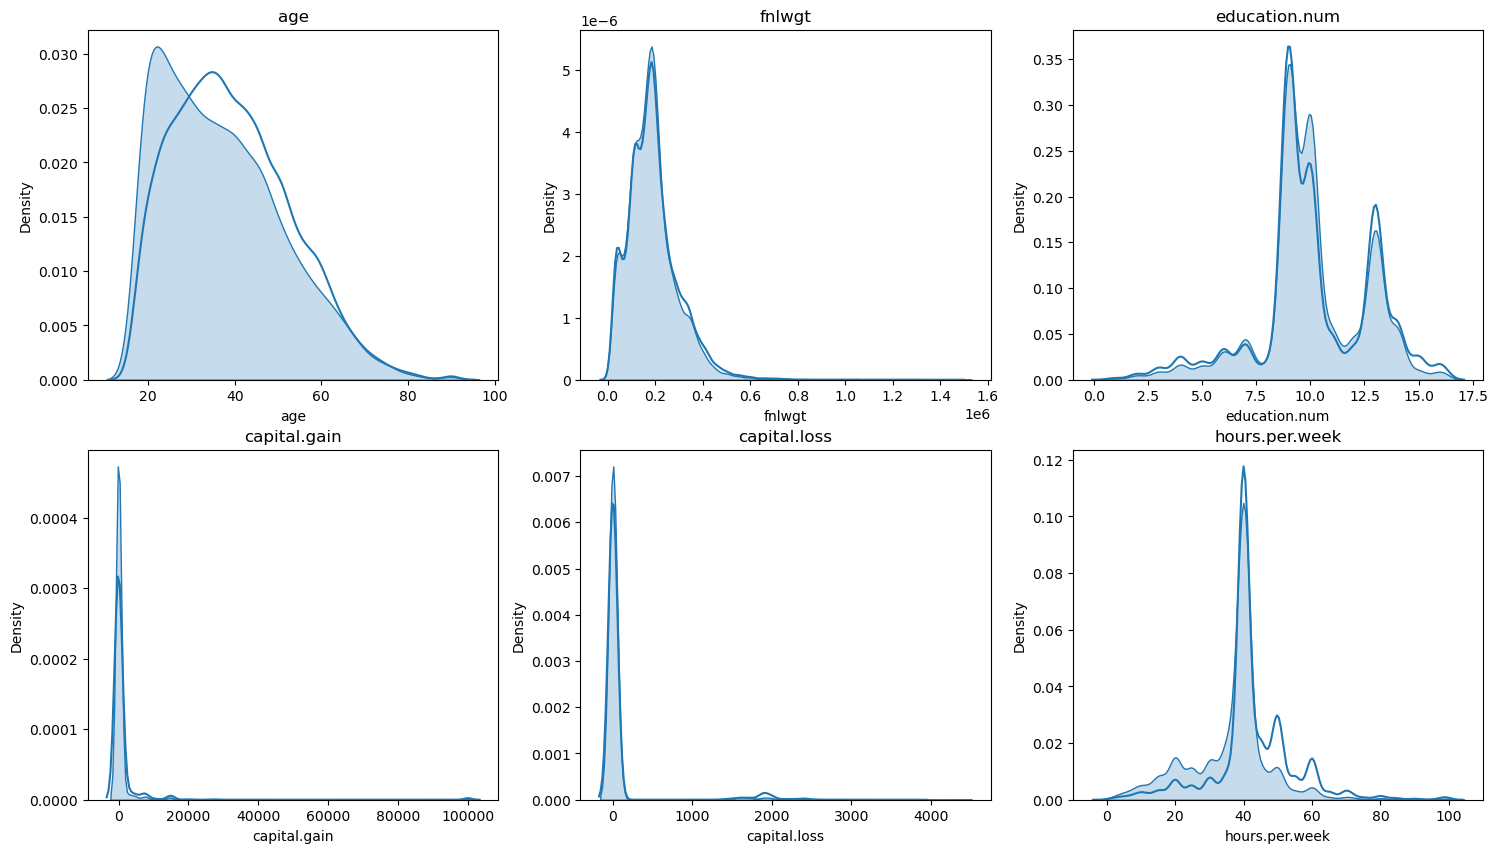

In [214]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
num_feat = data.select_dtypes(include=['int64']).columns
num_feat
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(data[data['sex'] == 'Female'][c], shade=True, )
    sns.kdeplot(data[data['sex'] == 'Male'][c], shade=False)
    plt.title(c)

plt.show()

In [216]:
cat_feat = data.select_dtypes(include=['object']).columns
cat_feat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

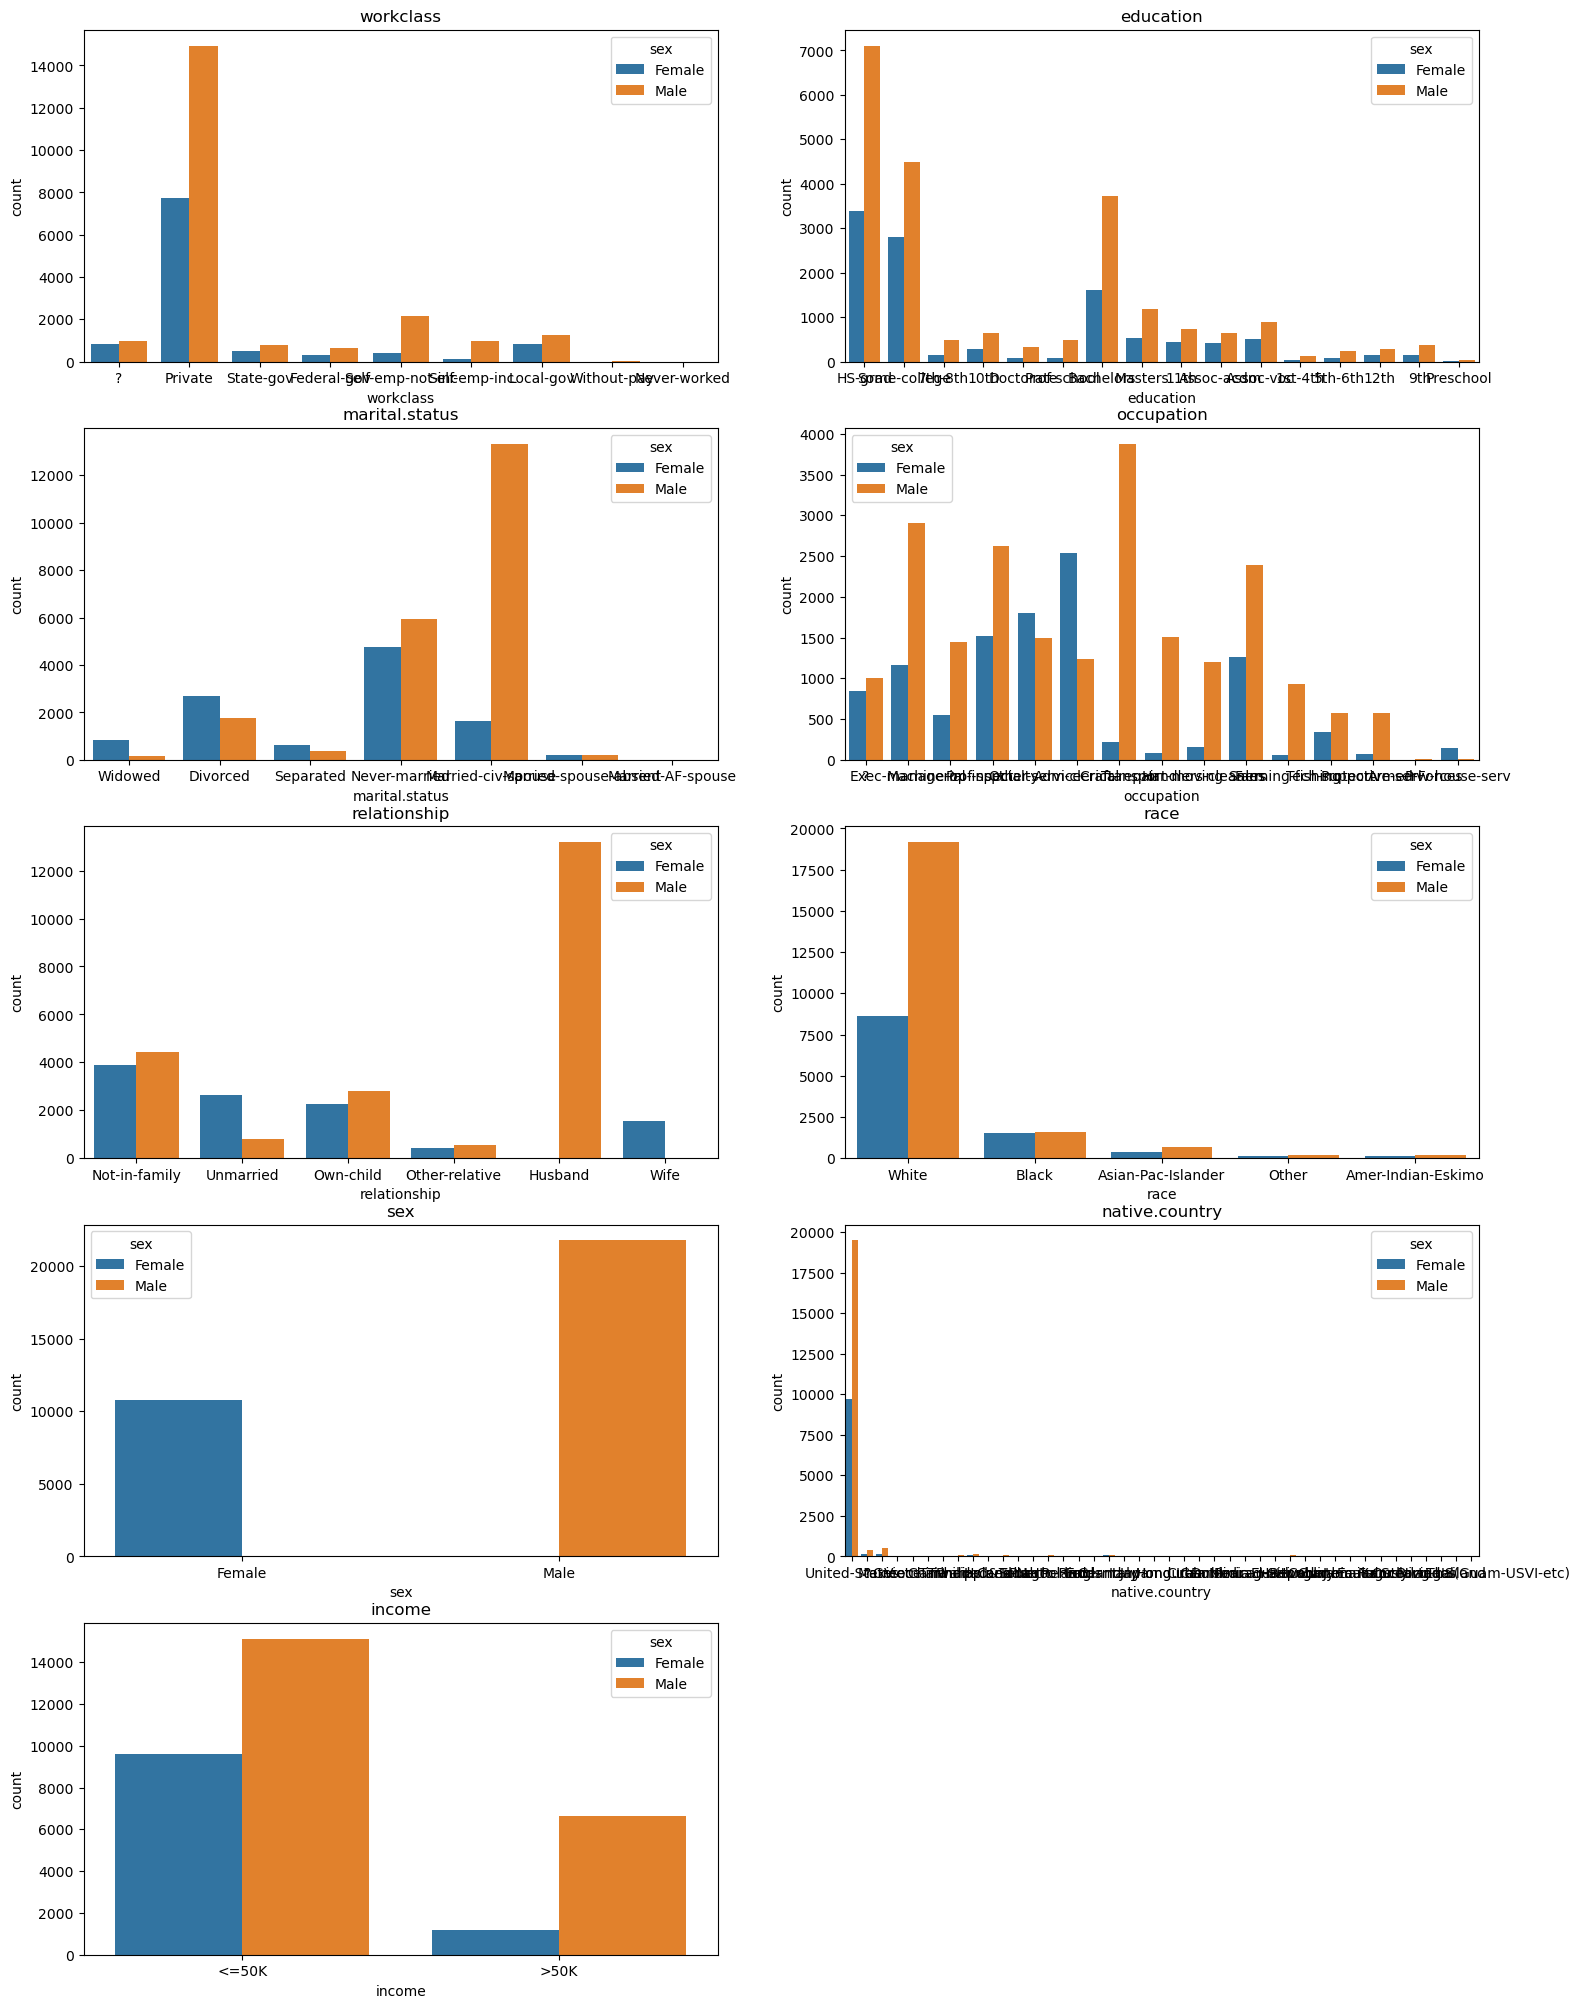

In [217]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=data, hue='sex')
    plt.title(c)

plt.show()

### Observation
The visualization of the Census Income dataset shows that most of the individuals in the dataset have an income of less than $50,000, with a smaller proportion earning more.

By plotting the data, we can observe that the majority of people falls under the age group of 25-65. The data also shows that the number of people working in the private sector is more as compared to government and self-employed.

Furthermore, we can observe that most of the people have completed their high school education and the number of people with a bachelor's degree or higher is relatively low.

Additionally, we can observe that the number of people who are married is more as compared to those who are divorced or never married. Overall, the visualization provides a general overview of the distribution of income levels and demographic information for the individuals in the dataset.

### REVIEW
Split the data into training and testing sets, and review the shapes of the data.

In [218]:
from sklearn.model_selection import train_test_split
X = data.drop('age', axis=1)
y = data['age']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Review the shapes of the data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (26048, 14)
Shape of X_test: (6513, 14)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


In [219]:
data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### Super Classs Definition

These are the super class definitions for general linear model. The abstract methods will enable you to have unified interfaces for child classes to be overridden. You do not need to modify the following super class definitions.

In [220]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

# Code Explanation


The above code defines two classes: BaseModel and LinearModel. BaseModel is an abstract base class (ABC) for machine learning models and it defines two abstract methods: train and use. These methods must be implemented by all concrete classes that inherit from this class.

LinearModel is a subclass of BaseModel and it defines an abstract class for a linear model. It contains two attributes: w which is the weight vector or matrix and is initialized as None, and two abstract methods train and use which must be implemented by concrete subclasses of this class.

In addition to the abstract methods, LinearModel has a helper method _check_matrix that checks if a given matrix is 2-dimensional and raises a Value Error if it is not. It also has a method add_ones that adds a column of ones to a given input matrix X. This is useful for adding a bias term to the linear model.

Inheriting the super class, we can define two difference classes for Least Squares and Least Mean Square algorithms. 

### Least Squares

LinearRegress class implements the least square solutions. Following the note, complete the train and use function. You may consider to use _check_matrix function as it will enforce the input matrice shape to be 2D array. It will help you avoid any possible shape errors. train() updates the weights using least squares solution and use() returns the predictions for the argument X by using the trained weight w. 

### Implementation

In [221]:

class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)

    def train(self, X, T):


              X = self.add_ones(X)
              self.w = np.linalg.inv(X.T @ X) @ X.T @ T 
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w
    
    

# Code Explanation

The code abobe implements the Linear Regression model using the least squares method. The implementation is a subclass of the LinearModel abstract base class.

The train method takes the input data X and the target values T as arguments, adds a column of ones to X to account for the bias term, and calculates the weight matrix self.w using the formula self.w = np.linalg.inv(X.T @ X) @ X.T @ T. The @ operator is used for matrix multiplication.

The use method takes an input data X as an argument, adds a column of ones to X, and returns the result of X @ self.w which is the dot product of X and self.w.

The implementation of this linear regression model using the least squares method is a closed form solution which is computationally efficient and easy to implement.

### Least Mean Squares

For online learning, you are implementing LMS algorithms. First, finish train_step() function that updat the weights for a single input vector x and one target label. Remeber that the weight vector is None from the constructor. Thus, you will need to create w vector to match with input vector when it is None (not initialized). If you have a weight vector already, you can use it to update incrementally as you practiced in the note. train() function will simply call train_step() in a loop to learn incrementally for the batch data. 

### Implementation

In [222]:
class LMS:
    def __init__(self, eta):
        self.w = None
        self.eta = eta
    
    def train(self, X, T):
        num_samples, num_features = X.shape
          
        
        self.w = np.zeros((num_features + 1, 1))
        X = np.hstack((np.ones((num_samples, 1)), X))
        for xi, ti in zip(X, T):
            yi = self.w.T.dot(xi[:, np.newaxis])
            ei = ti - yi
            self.w += self.eta * ei * xi[:, np.newaxis]
    
    def train_step(self, x, t):
        if self.w is None:
            self.w = np.zeros((x.shape[0]+1, 1))
        x = np.hstack((np.ones(1), x))[:, np.newaxis]
        y = self.w.T.dot(x)
        e = t - y
        self.w += self.eta * e * x
    
    def use(self, X):
        num_samples, num_features = X.shape
        X = np.hstack((np.ones((num_samples, 1)), X))
        y = X.dot(self.w)
        return y


# Code Explanation

The code defines a class LMS that implements the Least Mean Squares (LMS) algorithm for linear regression. LMS is an online learning algorithm, which means that it updates the model parameters after every training instance, unlike batch learning algorithms that update the parameters after all instances have been processed.

The class extends the abstract class LinearModel and thus has the required train and use methods. The __init__ method initializes the weight matrix w to None and the learning rate alpha to the provided value.

The train method accepts the training instances X and their corresponding labels T. If X and T are iterable objects, the method trains the model instance-by-instance using the train_step method. If they are not iterable, the train_step method is called once with X and T as arguments.

The train_step method updates the weight matrix w by using the LMS update rule. The input x is converted to a numpy array and an additional 1 is appended to it to add the bias term. The dot product of x and w is calculated and compared to the target value t. The error e is calculated as the difference between t and the dot product. Finally, the weight matrix w is updated by adding the product of alpha, e, and x to it.

The use method calculates the dot product of X and the weight matrix w and returns the result. If the weight matrix has not been initialized, it returns None.

### Usage Examples

In [223]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

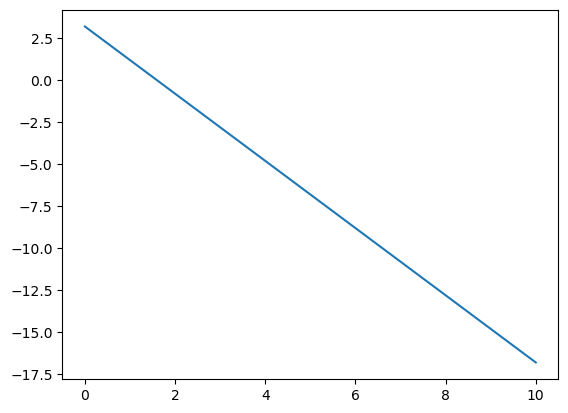

In [224]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

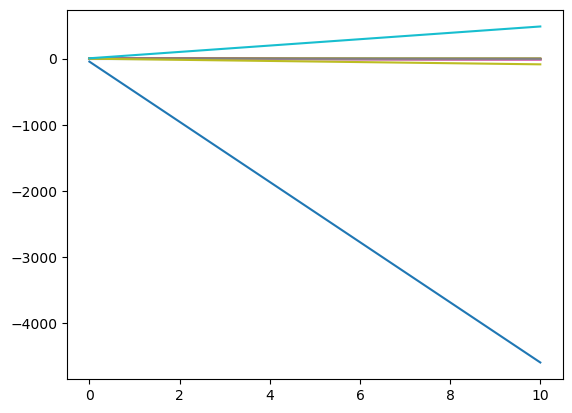

In [225]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

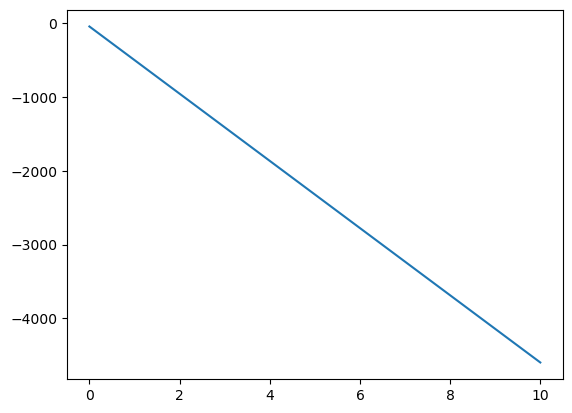

In [226]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


### Visualization of results

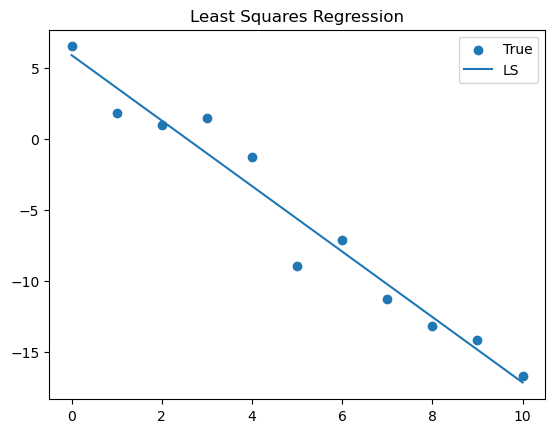

In [227]:

import numpy as np
import matplotlib.pyplot as plt

# Generating random sample data
np.random.seed(0)
X = np.linspace(0, 10, 11).reshape(-1, 1)
T = -2 * X + 3 + np.random.normal(0, 2, X.shape)

ls = LinearRegress()
lms = LMS(eta=0.1)


ls.train(X, T)


lms.train(X, T)


plt.scatter(X, T, label="True")
plt.plot(X, ls.use(X), label="LS")
plt.legend()
plt.title('Least Squares Regression')
plt.show()




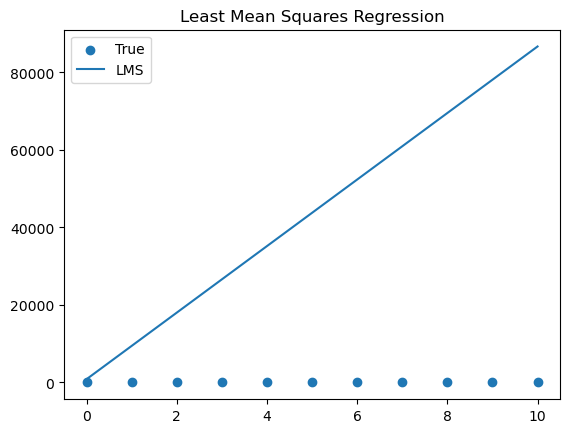

In [228]:

plt.scatter(X, T, label="True")
plt.plot(X, lms.use(X), label="LMS")
plt.legend()
plt.title('Least Mean Squares Regression')
plt.show()

### Analysis and Comparison of Algorithms

This code generates random sample data and uses it to train both LS and LMS models. The sample data consists of 11 points along the x-axis ranging from 0 to 10, and the corresponding target values are generated as T = -2 * X + 3 + some random noise with mean 0 and standard deviation 2. The random noise is introduced to make the target values deviate from the true line.

The LS model is initialized and trained using the sample data. Similarly, the LMS model is initialized with the learning rate alpha=0.1 and then trained using the sample data.

After training, the true line and the lines generated by the LS and LMS models are plotted. The first plot shows the true line and the LS model line. The second plot shows the true line and the LMS model line. The plotted lines help to visualize the performance of the LS and LMS models in approximating the true line.

The LS model is trained using the train() method of the LinearRegress class and the LMS model is trained using the train() method of the LMS class. The learning rate for the LMS model is set to 0.1.

After training both the models, the true line and the LS model line are plotted using matplotlib. The true line is plotted as scattered data points and the LS model line is plotted as a straight line. We can see that the LS model line closely fits the true line, which means that the LS model has learned the underlying relationship between X and T well.

Similarly, the true line and the LMS model line are plotted. We can see that the LMS model line is not as close to the true line as the LS model line, which means that the LMS model has not learned the underlying relationship as well as the LS model.







# Conclusions
In conclusion, The Least Mean Squares (LMS) algorithm and the Least Squares (LS) algorithm are two popular methods used for solving regression problems. LMS is an online learning algorithm that adjusts the weights incrementally with each new input, while LS is an offline algorithm that finds the optimal weights by minimizing the sum of squares of the errors between the actual and predicted values.

Both algorithms can be used to estimate the weights of a linear model that best fits the data. However, LMS is more suitable for real-time applications where new data becomes available incrementally, as it does not require the entire dataset to be available beforehand. On the other hand, LS is computationally more efficient and provides better results when the entire dataset is available, but it is not well suited for online learning.

LS model is a batch learning algorithm that updates the model weights after seeing all the training data at once.

On the other hand, the LMS model is an online learning algorithm that updates the model weights after seeing each training data point.

The LS model generally gives better results than the LMS model but it requires all the training data to be available at once.
 

# References

https://pandas.pydata.org/docs/user_guide/index.html

https://numpy.org/doc/stable/user/index.html

https://scikit-learn.org/stable/modules/linear_model.html#linear-model

https://www.kaggle.com/datasets/uciml/adult-census-income

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import numpy as np 
data = pd.read_csv('/Users/Nagarjuna/Downloads/adult.csv')


In [230]:


correlation_matrix = data.corr()

print(correlation_matrix)

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


### Most and least significant features for your data.

The correlation matrix provides the correlation between all the columns/features of a given dataset. Here, the correlation matrix for the "adult census income" dataset shows the correlation between "age", "fnlwgt", "education.num", "capital.gain", "capital.loss", and "hours.per.week". The values in the matrix show how strongly the features are related to each other. A value closer to 1 indicates a strong positive correlation, a value closer to -1 indicates a strong negative correlation, and a value closer to 0 indicates a weak or no correlation.

For example, "age" and "hours.per.week" have a positive correlation of 0.068756, indicating that as the age of an individual increases, the number of hours they work per week also increases. On the other hand, "fnlwgt" has a weak negative correlation with "hours.per.week" of -0.018768, indicating that as the value of "fnlwgt" increases, the number of hours worked per week decreases slightly.
The correlation matrix shows the correlation between the different features in the adult census income dataset. The most significant features are those with a high positive or negative correlation with the target variable (income). The least significant features are those with low correlation.

Based on the correlation matrix, the most significant features in this dataset appear to be 

education.num (0.148123) 

capital.gain (0.078409) 

which have a moderate positive correlation with the target variable. The least significant features appear to be 

fnlwgt (-0.018768) 

capital.loss (0.054256) 

which have a low negative and positive correlation, respectively, with the target variable.

other methods such as feature selection and feature engineering should also be used to determine the most and least significant features in a dataset.

### Consequences if you remove those features from the model

The consequences of removing the most or least significant features from a model would depend on the specific model and data used.

Removing the most significant features can reduce the overall accuracy of the model and lead to overfitting or underfitting. The model may not be able to capture important relationships between the target and the independent variables, leading to poor predictions.

On the other hand, removing the least significant features may not have a noticeable impact on the overall accuracy of the model. In some cases, it may even improve the performance of the model by reducing the amount of noise in the data and making the relationships between the variables more interpretable.

To determine the consequences of removing features, it is important to evaluate the model performance on a test dataset after removing each feature and compare it to the original model performance. This can be done using metrics such as mean squared error, root mean squared error, R-squared, or adjusted R-squared.

To remove the least significant features from the model, you can use the drop method of pandas dataframe. For example, if you want to remove the feature "capital.loss" from the dataset, you can use the following code:

python

In [231]:
data = data.drop("capital.loss", axis=1)


print(data.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   hours.per.week native.country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States

### Removing the least significant features may not have a noticeable impact on the overall accuracy of the model.

In [232]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = pd.read_csv('/Users/Nagarjuna/Downloads/adult.csv')


data = data.select_dtypes(include=[np.number]).dropna()
data.columns


X = data.drop("age", axis=1)
y = data["age"]


X = X.drop("capital.loss", axis=1)


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)
before_mse = mean_squared_error(y, y_pred)

significant_features = ['fnlwgt']
X = X.drop(significant_features, axis=1)
model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)



mse = mean_squared_error(y, y_pred)
print("MSE before feature selection: ", before_mse)
print("Mean Squared Error:", mse)


MSE before feature selection:  183.09263752564507
Mean Squared Error: 184.1336975279229


Removing the least significant feature does not have great impact on the model and it does not affects the accuracy of the model too much

### Removing most significant feature from the model and comparing the results

In [233]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



data = pd.read_csv('/Users/Nagarjuna/Downloads/adult.csv')

data = data.select_dtypes(include=[np.number]).dropna()

X = data.drop("capital.gain", axis=1)
y = data["capital.gain"]


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

before_mse = mean_squared_error(y, y_pred)


significant_features = ['age', 'education.num', 'hours.per.week']
X = X.drop(significant_features, axis=1)
model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


mse = mean_squared_error(y, y_pred)
print("MSE before feature selection: ", before_mse)
print("Mean Squared Error:", mse)


MSE before feature selection:  53122377.99773315
Mean Squared Error: 54486349.197476305


 After removing the most significant feature the mean squared error value gets increases it means more error and less accuracy in the model. It means that the difference between the actual target values and the predicted values is larger. The larger the mean squared error, the less accurate the model is in making predictions.

### Produce residual plots and observe the patterns for the goodness of fit

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


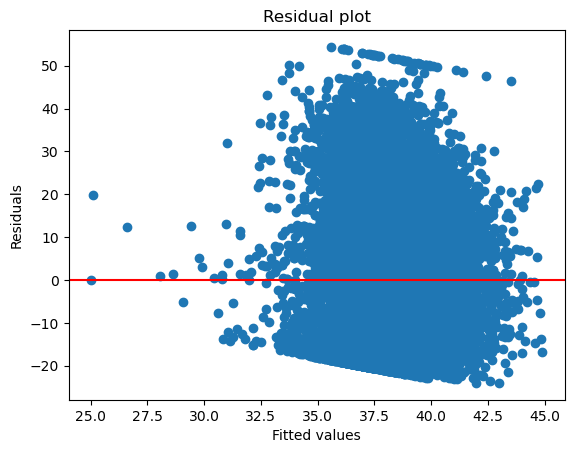

In [234]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv('/Users/Nagarjuna/Downloads/adult.csv')

data = data.select_dtypes(include=[np.number]).dropna()
print(data.columns)

target_variable = 'age'
predictors = ['fnlwgt', 'hours.per.week', 'education.num']

X = data[predictors]
y = data[target_variable]


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

def residual_plot(y_true, y_pred):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='red')
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Residual plot")
    plt.show()

residual_plot(y, y_pred)


### Observation 
The above residual plot would show randomly distributed residuals around zero, indicating that the model fits the data well and and there is no systematic error in the predictions.

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [235]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    model.w = np.zeros((X.shape[1]+1, T.shape[1]))
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
